This code is created by Juhee Bae for the purpose of instructing "Introduction to Data Science - Visualization in Python" in 2021 Fall. Refer to the lecture and the code provided on Canvas. Do not share with external venues.

Write your answer of each question as a 'description' under your plot. 

Q2 has 4 sub-questions, Q5 has 2 sub-questions, and Q9 has 2 sub-questions. With the subquestions, there are 15 questions.

Course: Introduction to Data Science - Visualization in Python

Your name: HARAS AHMAD ZEESHAN

login id: a20harze@student.his.se

# Import Libraries

In [4]:
#import packages
import pandas as pd
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sb
import seaborn as sns
import plotly.express as px

# Read and check your dataset

In [5]:
#load data with pandas
#change the directory to where the csv file is located
titanic_df = pd.read_csv("titanic.csv")

In [6]:
#return five first rows of the data frame
titanic_df.head(5)

,Survived,Pclass,Name,Gender,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [7]:
# series
titanic_df["Parents/Children Aboard"].value_counts()

0    674
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parents/Children Aboard, dtype: int64

In [8]:
# check missing values in dataset
titanic_df.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Gender                     0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [9]:
#details of each feature
titanic_df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [10]:
#type of each feature
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Gender                   887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


## Correlation

Survived                   1.000000
Pclass                     0.336528
Fare                       0.256179
Parents/Children Aboard    0.080097
Age                        0.059665
Siblings/Spouses Aboard    0.037082
Name: Survived, dtype: float64


<AxesSubplot:>

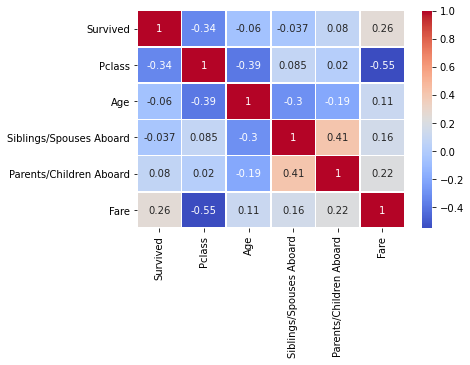

In [11]:
print(titanic_df.corr()["Survived"].abs().sort_values(ascending=False))
fig, ax = plt.subplots() # Sample figsize in inches, figsize=(13,13)
sb.heatmap(titanic_df.corr(), annot=True, linewidths=.5, ax=ax, cmap="coolwarm")

## Bin the continuous values into discrete intervals

In [12]:
#https://pandas.pydata.org/docs/reference/api/pandas.cut.html
#Bin the continuous values into discrete intervals.

#labels for age
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
#use pandas cut to bin the continuous variable age
titanic_df['age_group'] = pd.cut(titanic_df.Age, range(0, 81, 10), labels=age_labels)
titanic_df.tail(5) #show the last five rows

,Survived,Pclass,Name,Gender,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,age_group
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.00,21-30
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.00,11-20
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.45,0-10
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.00,21-30
886,0,3,Mr. Patrick Dooley,male,32.0,0,0,7.75,31-40


## Check the dataset with conditions.

In [13]:
titanic_df[(titanic_df['Gender']=='female') & (titanic_df['Age'] > 61) ]

,Survived,Pclass,Name,Gender,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,age_group
273,1,1,Miss. Kornelia Theodosia Andrews,female,63.0,1,0,77.9583,61-70
480,1,3,Mrs. (Hedwig) Turkula,female,63.0,0,0,9.5875,61-70
561,0,3,Miss. (Marion Ogden) Meanwell,female,62.0,0,0,8.0500,61-70
825,1,1,Mrs. George Nelson (Martha Evelyn) Stone,female,62.0,0,0,80.0000,61-70


In [14]:
titanic_df[(titanic_df['Parents/Children Aboard'] == 3) ]

,Survived,Pclass,Name,Gender,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,age_group
85,0,3,Mr. William Neal Ford,male,16.0,1,3,34.3750,11-20
434,1,2,Mrs. Sidney (Emily Hocking) Richards,female,24.0,2,3,18.7500,21-30
732,0,3,Mrs. Edward (Margaret Ann Watson) Ford,female,48.0,1,3,34.3750,41-50
770,1,2,Mrs. Elizabeth (Eliza Needs) Hocking,female,54.0,1,3,23.0000,51-60
854,1,3,Mrs. Solomon (Latifa Qurban) Baclini,female,24.0,0,3,19.2583,21-30


# Start of your input:

Q2 has 4 sub-questions, Q5 has 2 sub-questions, and Q9 has 2 sub-questions. With the subquestions, there are 15 questions.

# Q1. [Bar plot] Distribution of Pclass in percentage

- Create a bar plot using pandas .plot with kind="bar" in orange color.
- Create the grid with a grid style as below.
- <span style="color:blue">Do not forget to add all the details (e.g., title, labels, grid, description, legends if any)</span>.

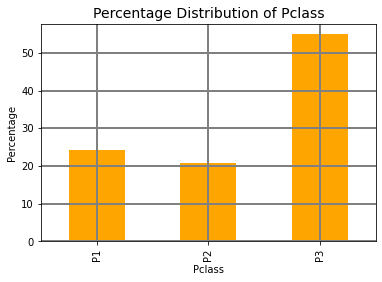

In [22]:
# Q1-1> Write your code here.
pc = ((titanic_df['Pclass'].value_counts(normalize=True))*100).sort_index()
pc.plot(kind='bar', color='orange') 
plt.title("Percentage Distribution of Pclass", fontsize=14);
plt.ylabel('Percentage') # set the y label
plt.xlabel('Pclass') # set the x label
# set the grid 
plt.grid(color = "grey", linewidth = "2")
# The figure below shows the grid style and the positions of labels and title.


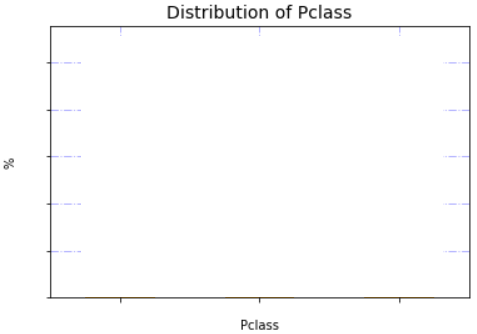

Most passengers belong to Pclass 3 (54.9%). while Pclass 1 has (27.7%) and Pclass 2 has (20.7%) passengers out of 887 total.

# Q2. [Bar plot] Which Pclass had a better chance of survival?

* Use color 'green' for survivors and 'tab:olive' for non-survivors. Choose your own style for the grid.
- Q2-1. Use plt.bar(). Create stacked bar charts, vertical, with counts on y-axis. 
- Q2-2. Use plt.bar(). Create stacked bar charts, horizontal, with percentage of survival rate on x-axis. 
- Q2-3. Use Seaborn displot(). Create stacked bar charts, vertical, with counts on y-axis. 
- Q2-4. Use Seaborn. Create grouped bar charts, horizontal, with "percentage on x-axis of survival rates". No need to display non-survivors but the grouped bar charts display gender. Use color to distinguish gender.
- <span style="color:blue">Do not forget to add all the details (e.g., title, labels, grid, description, legends if any)</span>.

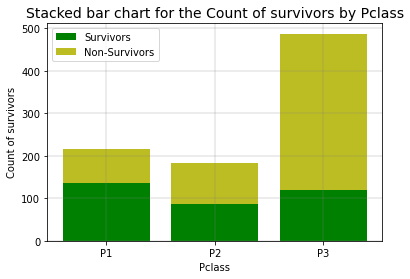

In [28]:
# Q2-1> 
sur_pclass =  titanic_df[titanic_df.Survived==True].groupby(['Pclass']).size().values
n_sur_pclass = titanic_df[titanic_df.Survived==False].groupby(['Pclass']).size().values
plt.figure(figsize = (6,4))
plt.bar(range(len(sur_pclass)), sur_pclass, label='Survivors', color='green')
plt.bar(range(len(n_sur_pclass)), n_sur_pclass, bottom=sur_pclass, label='Non-Survivors', color='tab:olive')
plt.xticks([0, 1,2], ["P1","P2","P3"])
plt.legend(loc='upper left')
plt.title("Stacked bar chart for the Count of survivors by Pclass",fontsize=14)
plt.xlabel("Pclass")
plt.ylabel("Count of survivors")
plt.grid(color = "grey", linewidth = "0.3", linestyle = "-")
plt.show()

P1 has best rate for survivals.

In [14]:
# Check the counts of groupings
tempc = titanic_df.groupby(['Pclass','Survived'])['Pclass'].count()
temps = titanic_df.groupby(['Pclass'])['Pclass'].size()
tdiv = tempc/temps
print(tempc,"\n",temps,"\n",tdiv)

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           368
        1           119
Name: Pclass, dtype: int64 
 Pclass
1    216
2    184
3    487
Name: Pclass, dtype: int64 
 Pclass  Survived
1       0           0.370370
        1           0.629630
2       0           0.527174
        1           0.472826
3       0           0.755647
        1           0.244353
Name: Pclass, dtype: float64


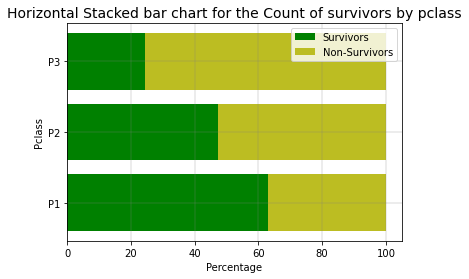

In [31]:
# Q2-2
sm = sur_pclass + n_sur_pclass 
def percentage_calc(val, total, format_percent = False):
    percentage = np.divide(val, total, dtype=float)
    if format_percent:
        percentage = as_percent(percentage)
    return percentage

sur_p = percentage_calc(sur_pclass, sm)*100 
n_sur_p = percentage_calc(n_sur_pclass, sm)*100 

plt.barh(range(len(sur_p)), sur_p, label='Survivors', color='green')
plt.barh(range(len(n_sur_p)), n_sur_p, left=sur_p,
         label='Non-Survivors', color='tab:olive')

plt.yticks([0, 1, 2], ["P1","P2","P3"])
plt.legend(loc='upper right')
plt.title("Horizontal Stacked bar chart for the Count of survivors by pclass",fontsize=14)
plt.xlabel("Percentage")
plt.ylabel("Pclass")
plt.grid(color = "grey", linewidth = "0.3", linestyle = "-")

#from cycler import cycler
#plt.rc('axes', prop_cycle=(cycler('color', ['tab:olive', 'green'])))
#tempc = titanic_df.groupby(['Pclass','Survived'])['Pclass'].count()
#temps = titanic_df.groupby(['Pclass'])['Pclass'].size()
#tdiv = 100*(tempc/temps)
#tdiv.unstack().plot(kind='barh', stacked='True')
#plt.xlabel('survival rate %')

maximum survival rate is in class 1 and goes on decreasing till class 3.

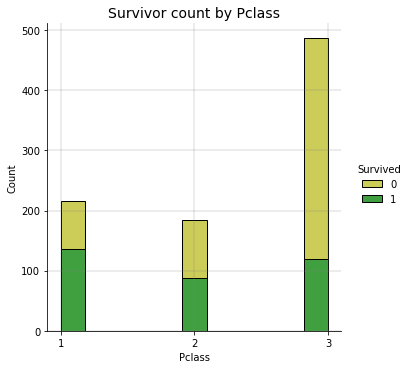

In [34]:
# Q2-3> Write your code here. Use Seaborn.
from cycler import cycler
plt.rc('axes', prop_cycle=(cycler('color', ['tab:olive', 'green'])))
sns.displot(data=titanic_df, x="Pclass", hue="Survived", multiple="stack")
plt.xticks([1,2,3])
plt.title("Survivor count by Pclass",fontsize=14)
plt.grid(color = "grey", linewidth = "0.3", linestyle = "-")

Survivors from Pclass 1 are 136, Pclass 2 are 87 and Pclass 3 are 119. 

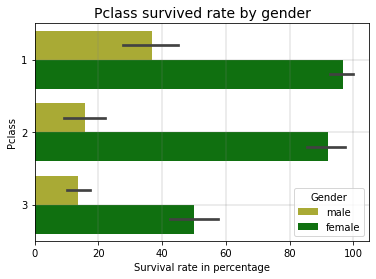

In [35]:
# Q2-4> Write your code here. Use Seaborn.
sb.barplot(data=titanic_df, x="Survived", y="Pclass", hue="Gender", orient="h", estimator=lambda x: sum(x)*100.0/len(x))
plt.grid(color = "grey", linewidth = "0.3", linestyle = "-")
plt.title("Pclass survived rate by gender",fontsize=14)
plt.xlabel("Survival rate in percentage")
plt.show()

Highest survival rates for both genders are in passenger class 1. Within each Pclass. In passenger class2, gap between genders is biggest. There exist 90% or more survial rate for females in passenger classes 1 and 2. 

# Q3. [Bar plot] Which age_group had a better chance of survival considering the gender?

- Use Seaborn. Create grouped bar charts, vertical, with "percentage of survival rates on y-axis and age_group on x-axis".
- Refer to 'Bin the continuous values into discrete intervals' described above.
- Hue represents gender. 
- <span style="color:blue">Do not forget to add all the details (e.g., title, labels, grid, description, legends if any)</span>.

Text(0, 0.5, 'Percentage of survival rate')

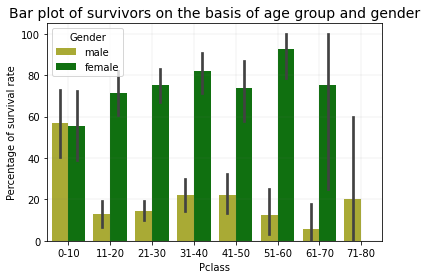

In [36]:
# Q3> Write your code here. Use Seaborn.
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
titanic_df['age_group'] = pd.cut(titanic_df.Age, range(0, 81, 10), labels=age_labels)

sb.barplot(data=titanic_df,
            x="age_group",
            y="Survived",
            hue="Gender", 
           estimator = lambda x: sum(x)*100.0/len(x))
plt.title("Bar plot of survivors on the basis of age group and gender",fontsize=14)
plt.grid(color = "grey", linewidth = "0.1", linestyle = "-")
plt.xlabel("Pclass")
plt.ylabel("Percentage of survival rate")

females of age group 51-60 has best chance of survival. males of age group 0-10 have best chance of survival.

# Q4. [Pie plot] Distribution of Pclass in percentage.

- Use 3 different colors to color the pie plot for the three Pclasses.
- Start the pie start angle from 0 degrees.
- Round to two decimal places to show percentage numbers and add '%' after the number.
- Use the 'explode' parameter to distinguish the largest distribution of Pclass.
- <span style="color:blue">Do not forget to add all the details (e.g., title, labels, grid, description, legends if any)</span>.

Text(0.5, 1.0, 'Passenger class Distribution')

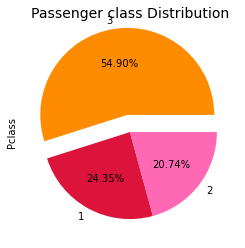

In [51]:
# Q4> Write your code here. 
my_e = [0.2, 0, 0]
titanic_df['Pclass'].value_counts().plot(kind='pie', startangle=0, autopct='%.2f%%', explode=my_e, colors = ["darkorange", "crimson", "hotpink"])
plt.title("Passenger class Distribution", fontsize=14)

In passenger class 3, there were 50% or more passengers. 

# Q5. [Histogram] Distribution of Siblings/Spouses Aboard and Parents/Children Aboard.

- Q5-1. Create a histogram of the distribution of Siblings/Spouses Aboard with 4 bins.
- Q5-2. Create a histogram of the distribution of Parents/Children Aboard with 3 bins.
- <span style="color:blue">Do not forget to add all the details (e.g., title, labels, grid, description, legends if any)</span>.

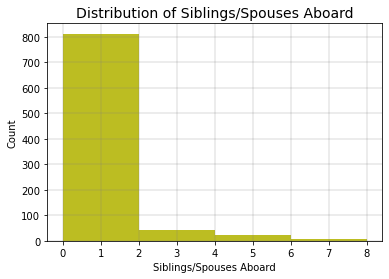

In [153]:
# Q5-1> Write your code here.
titanic_df['Siblings/Spouses Aboard'].plot(kind='hist', bins=4)
plt.title("Distribution of Siblings/Spouses Aboard", fontsize=14) 
plt.ylabel("Count") 
plt.xlabel("Siblings/Spouses Aboard")
plt.grid(color = "grey", linewidth = "0.3", linestyle = "-")

841 passengers belong to bin 0-2, which means most of the passengers have 0-2 siblings/spouses abroad. 23 passengers belong to bin 6-8. 

In [54]:
titanic_df['Siblings/Spouses Aboard'].value_counts()

0    604
1    209
2     28
4     18
3     16
8      7
5      5
Name: Siblings/Spouses Aboard, dtype: int64

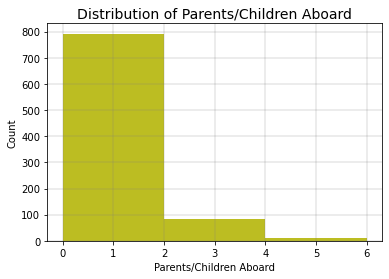

In [155]:
# Q5-2> Write your code here.
titanic_df['Parents/Children Aboard'].plot(kind='hist', bins=3)
plt.title("Distribution of Parents/Children Aboard", fontsize=14) 
plt.ylabel('Count') 
plt.xlabel('Parents/Children Aboard')
plt.grid(color = "grey", linewidth = "0.3", linestyle = "-")

872 passengers belong to bin 0-2, which means most of the passengers have 0-2 parents/childern abroad. 10 passengers belong to bin 4-6.

In [52]:
titanic_df['Parents/Children Aboard'].value_counts()

0    674
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parents/Children Aboard, dtype: int64

# Q6. [Boxplot] Which ss_group ('0', '1-2', '3-6', and '7-8') has survived more?

- Refer to how the continuous variable age is categorized into age_group from lecture and section above-'Bin the continuous values into discrete intervals'. Use pd.cut().
- Categorize Siblings/Spouses Aboard into 4 bins, '0', '1-2', '3-6', and '7-8' and name the column ss_group.
- Show mean value with a marker of your style.
- With the ss_group, draw box plots regarding ss_group (x) and age (y). Use color to present survivors/non-survivors. Which ss_group ('0', '1-2', '3-6', and '7-8') has survived more?
- <span style="color:blue">Do not forget to add all the details (e.g., title, labels, grid, description, legends if any)</span>.

In [56]:
# Use pd.cut to categorize the 'Siblings/Spouses Aboard' into bins with '0', '1-2', '3-6', and '7-8'.
# labels for siblings or spouse
# ss_labels = ['0', '1-2', '3-6', '7-8']
# > Write your code here. 
ss_labels = ['0', '1-2', '3-6', '7-8']
titanic_df['ss_group'] = pd.cut(titanic_df['Siblings/Spouses Aboard'], bins=[-1,.9,2,6,8], labels=ss_labels)
#titanic_df[(titanic_df['Siblings/Spouses Aboard'] == 4) ]
(titanic_df['Siblings/Spouses Aboard']).mean()

0.5253664036076663

In [57]:
# Check the rows whether 'Siblings/Spouses Aboard' value matches the bins with titanic_df.iloc[].
# Check rows 118, 119, 372, 838, 845, 846, 859.
# > Write your code here. 
titanic_df.iloc[[118, 119, 372, 838, 845, 846, 859], :]

,Survived,Pclass,Name,Gender,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,age_group,ss_group
118,0,3,Miss. Ellis Anna Maria Andersson,female,2.0,4,2,31.2750,0-10,3-6
119,0,2,Mr. Stanley George Hickman,male,21.0,2,0,73.5000,21-30,1-2
372,0,3,Miss. Stina Viola Palsson,female,3.0,3,1,21.0750,0-10,3-6
838,1,1,Miss. Augusta Serepeca,female,30.0,0,0,31.0000,21-30,0
845,1,1,Mrs. Samuel L (Edwiga Grabowska) Goldenberg,female,40.0,1,0,89.1042,31-40,1-2
846,0,3,Master. Sigvard Harald Elias Andersson,male,4.0,4,2,31.2750,0-10,3-6
859,0,3,Miss. Dorothy Edith Sage,female,14.0,8,2,69.5500,11-20,7-8


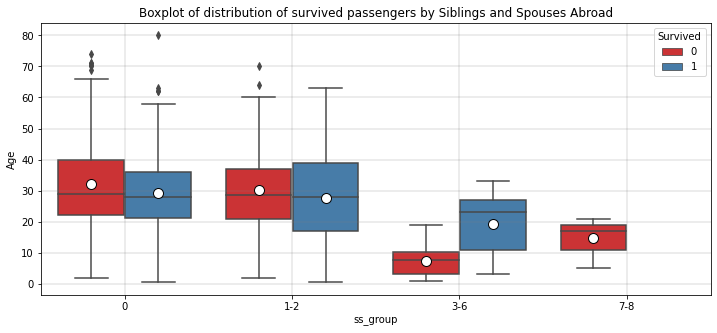

In [58]:
# Q6> Write your code here for the boxplot. 
# define plot 
plt.figure(figsize = (12,5))
sb.boxplot(x="ss_group", y="Age", hue="Survived", data=titanic_df, 
           showmeans = True, 
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},
           palette="Set1")
#place legend in center right of plot
plt.title('Boxplot of distribution of survived passengers by Siblings and Spouses Abroad')
plt.legend(loc='upper right', title='Survived')
plt.grid(color = "grey", linewidth = "0.3", linestyle = "-")

age group (ss_group) 1-2 has survived more.

# Q7. [Scatterplot] For the passengers younger than 20, is there a difference, by gender, between survivors who had no sibling/spouse vs. who had one sibling/spouse? What about vs. more than one sibling/spouse?

- Use Seaborn's relplot() to draw two scatterplots with age and Siblings/Spouses Aboard. Left view showing male and right view showing female.
- Hue represents survivors/non-survivors, size represents fare, and different shapes represent Pclass.
- Check the difference between survivors by gender, age, Siblings/Spouses Aboard, fare, and Pclass information.
- For the passengers younger than 20, is there a difference, by gender, between survivors who had no siblings vs. who had one sibling?
- <span style="color:blue">Do not forget to add all the details (e.g., title, labels, grid, description, legends if any)</span>.

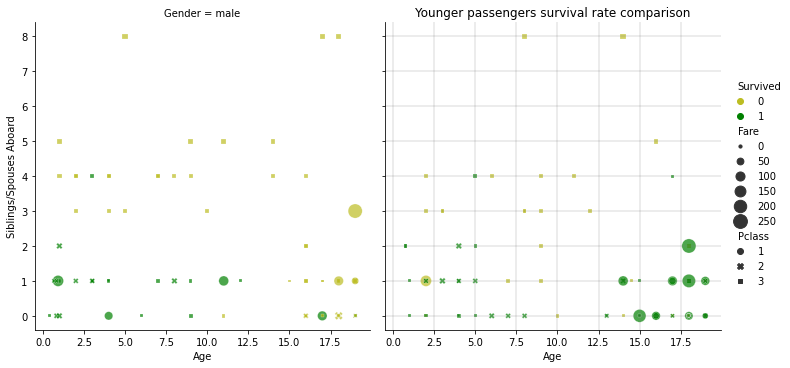

In [59]:
# Q7> Write your code here. 
sb.relplot(
    data=titanic_df[titanic_df.Age < 20], x="Age", y="Siblings/Spouses Aboard", size="Fare", sizes=(10, 200),
    col="Gender", hue="Survived", style="Pclass",
    alpha=0.7,
    kind="scatter"
);
plt.title("Younger passengers survival rate comparison")
plt.grid(color = "grey", linewidth = "0.3", linestyle = "-")
plt.show()

100% survival rate:
Gender 'male', Siblings/Spouses Aboard 0, age '0-10'
Gender 'male', Siblings/Spouses Aboard 1, age '0-10'

higer survival rates:
Gender 'male', Siblings/Spouses Aboard (0,1,2), age '0-10'
Gender 'female', Siblings/Spouses Aboard (0,1,2), age '10-20'

Regardless of gender, fare, passenger class, and age, those belonging to ss_group 5 to 8 have not survived. 

# Q8. [Scatterplot] A plot with age, fare, ss_group, and survivors/non-survivors.

- Use Seaborn scatterplot() to draw a scatterplot with age (x) and fare (y).
- Hue represents ss_group, size represents ss_group with bigger values showing bigger circles, and survivor/non-survivor in different shapes.
- Use size_order = ['7-8', '3-6', '1-2', '0'] for size ordering.
- Use style_order to show O for survivors and X for non-survivors.
- In your description, write your overall explanation of the survivors and non-survivors by age, fare, and sibling/spouse aboard information.
- <span style="color:blue">Do not forget to add all the details (e.g., title, labels, grid, description, legends if any)</span>.

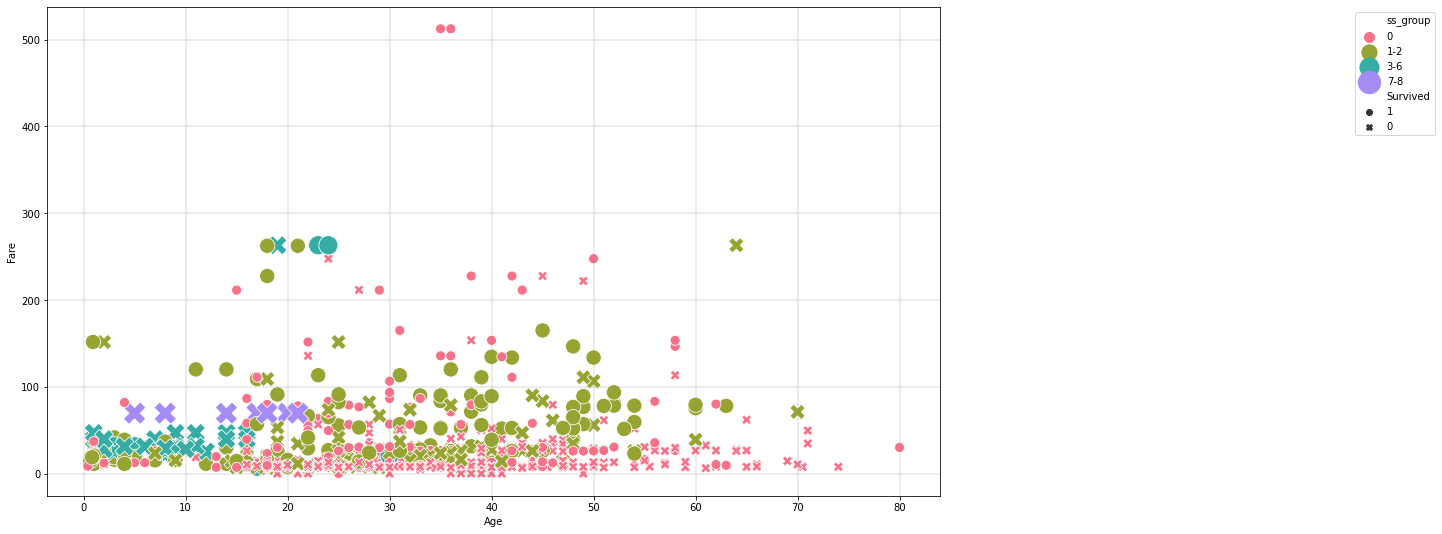

In [60]:
#a=["X","O"]
plt.figure(figsize = (16,9))
# Q8> Write your code here. 
sb.scatterplot(x="Age", y="Fare", hue="ss_group", 
               size="ss_group", sizes=(100, 500), size_order = ['7-8', '3-6', '1-2', '0'], 
               style="Survived",style_order=[1,0], data=titanic_df);

plt.grid(color = "grey", linewidth = "0.3", linestyle = "-")
plt.legend(bbox_to_anchor=(1.56, 1.0), loc='upper right')

Most survivors belong to 0-1 and 1-2 ss_groups, fare range 0-100 approx. In ss_group 7-8, non survivors approx. have age less than 25 and fare less than 100. In ss_group 3-6 majority of passengers with age less than 18 did not survive. Majority of those who did not survive and have age over 60 are in ss_group 0. 

# Q9. [Heatmap] Find the "age_group - Siblings/Spouses Aboard" and "age_group -Parents/Children Aboard" pairs with survivor rate over 60%.

- Q9-1. Create a heatmap from a pivot table of age_group and Siblings/Spouses Aboard. Get the percentage of survivors for each cell and find those pairs of 'age_group - Siblings/Spouses Aboard' that shows survivor rate over 60%.
- Q9-2. Create a heatmap from a pivot table of age_group and Parents/Children Aboard. Get the percentage of survivors for each cell and find those pairs of 'age_group - Siblings/Spouses Aboard' that shows survivor rate over 60%. 
- Round to three decimal place to show percentage numbers. 
- <span style="color:blue">Do not forget to add all the details (e.g., title, labels, grid, description, legends if any)</span>.

Text(0.5, 1.0, 'The heatmap of survivors by age_group and Siblings/Spouses Aboard')

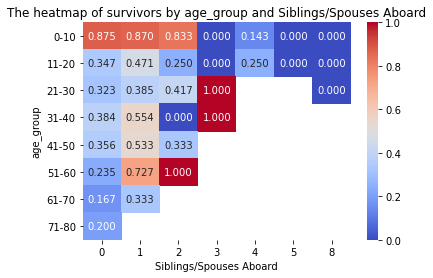

In [61]:
# Q9-1> Write your code here.
pivot = titanic_df.pivot_table(index='age_group', columns='Siblings/Spouses Aboard', values='Survived', aggfunc=np.mean)
sb.heatmap(pivot, cmap='coolwarm', annot=True, fmt="1.3f")
plt.title('The heatmap of survivors by age_group and Siblings/Spouses Aboard')

pairs of 'age_group - Siblings/Spouses Aboard' that shows survivor rate over 60% are:
age group 0-10 and Siblings/Spouses Aboard 0,1 and 2.
age group 21-30 and Siblings/Spouses Aboard 3.
age group 31-40 and Siblings/Spouses Aboard 3.
age group 51-60 and Siblings/Spouses Aboard =1 and 2. 

Text(0.5, 1.0, 'The heatmap of survivors by age_group and Parents/Children Aboard')

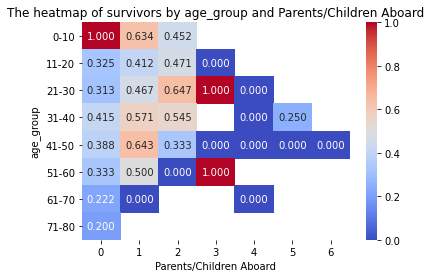

In [62]:
# Q9-2> Write your code here. 
pivot = titanic_df.pivot_table(index='age_group', columns='Parents/Children Aboard', values='Survived', aggfunc=np.mean)
sb.heatmap(pivot, cmap='coolwarm', annot=True, fmt="1.3f")
plt.title('The heatmap of survivors by age_group and Parents/Children Aboard')

pairs of 'age_group - Siblings/Spouses Aboard' that shows survivor rate over 60% are:
with age group 0-10 and Parents/Children Aboard = 0 and 1.
with age group 21-30 and Parents/Children Aboard = 2 and 3.
with age group 41-50 and Parents/Children Aboard = 1.
with age group 51-60 and Parents/Children Aboard = 3.

# Q10. [3D interaction] For the passengers younger than 20, is there a difference, by gender, between survivors who had no parents/children aboard vs. who had one parent/child aboard? What about vs. more than one parent/child aboard?

- Use plotly px.scatter_3d to create a 3D plot.
- Use color to represent surviors/non-survivors and different symbols to represent Pclass.
- Use size to represent 'Siblings/Spouses Aboard'.
- Use hover_data=[] to show all features available.
- The symbol for Pclass 1 is given below. The title needs to be updated.
- <span style="color:blue">Do not forget to add all the details (e.g., title, labels, grid, description, legends if any)</span>.

In [10]:
# # Q10

y_df = titanic_df[titanic_df.Age > 60]
y_df

#issue with 'Siblings/Spouses Aboard' having zeros
ssSize = np.array(y_df['Siblings/Spouses Aboard']) 
ssSize = (ssSize + 1)

#using scatter_3d
fig = px.scatter_3d(y_df, x='Age', y='Parents/Children Aboard', z='Gender', #Parents/Children Aboard
              color='Survived', size=ssSize, size_max=30,
              symbol='Pclass', opacity=0.8,
              hover_data=['Siblings/Spouses Aboard','Parents/Children Aboard'],
              color_continuous_scale='Portland')

# changing legend position and tight layout 
fig.for_each_trace(
    lambda trace: trace.update(marker_symbol="diamond-open") 
    if trace.name == "1" 
    else( 
        trace.update(marker_symbol="circle-open") if trace.name == "2" else()) )


#grey marker line
fig.update_traces(marker=dict(line=dict(width=1, color='black')), selector=dict(mode='markers'))

fig.update_layout(
    title={
        'text': "Comparison of Younger passengers survival rate",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    margin=dict(l=0, r=0, b=0, t=0),
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
))

fig.show()


Gender 'female' with 0 and 1 parents/childern abroad, age group 15-19 have higher survival rate if compared with gender 'male' with 0 and 1 parents/childern abraod, age group 15-19. 'male' show 0% survival rate in this category. 
Gender 'female' with 0-2 parents/children aboard, age 0-20 have survivors. 
One instance gender 'female', younger than 10 has survived with 0 parents/childern aboard. 
Gender 'female' with age less than 20, with 2 parents/childern abroad have a higher survival rate.